In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, peak_widths, savgol_filter

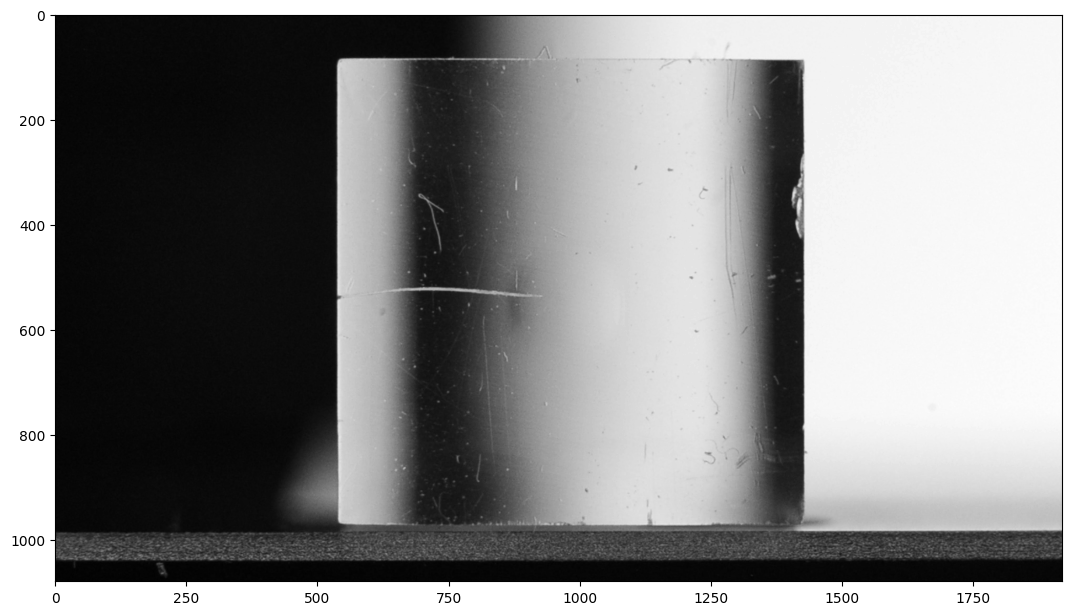

In [3]:
img = cv2.imread("O2_videos_frames/EJ200PS-1X1P-3/FaceA/frame0.png")

im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(figsize=(13, 13))
ax.imshow(im_gray, cmap="gray")

(0.1, 100)

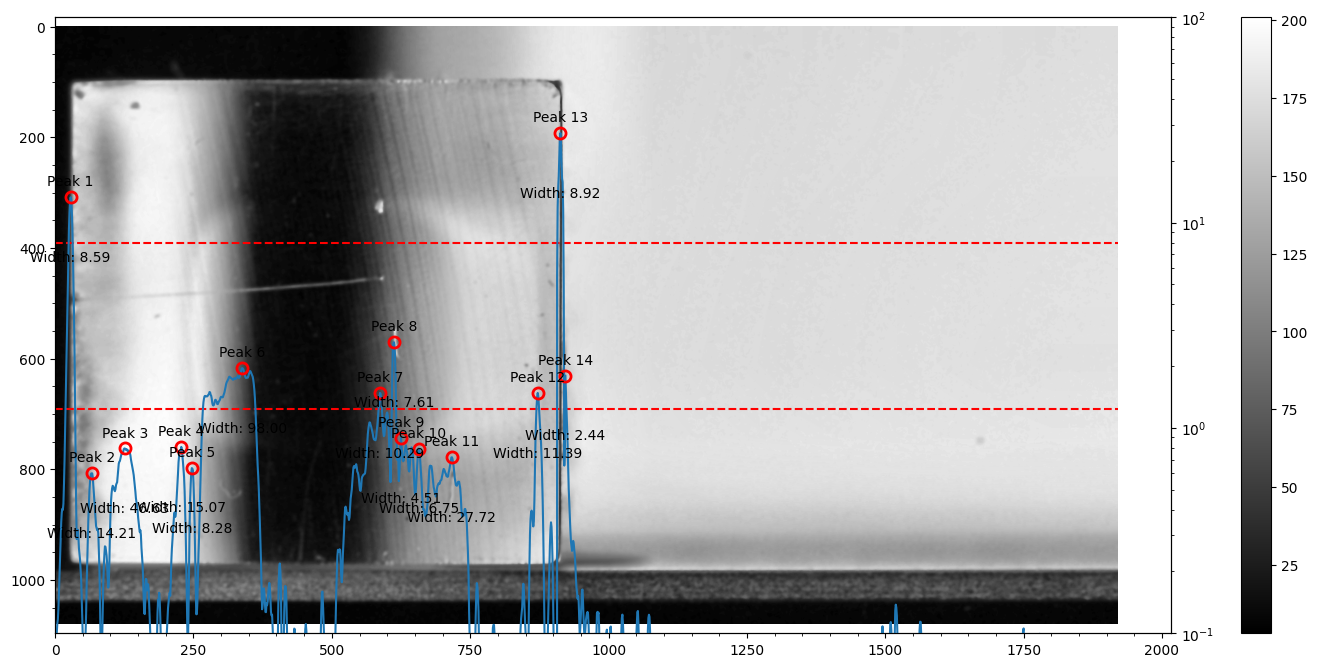

In [31]:
cut = 150
window_length = 11
polyorder = 3
prominence = 0.3
rel_height = 0.5

d = 9
sigmaColor = 100
sigmaSpace = 100

img = cv2.imread("O2_videos_frames/EJ200PVT-1X1P-N5/FaceC/frame0.png")

blur = cv2.bilateralFilter(img, d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)
im_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

# x, y, w, h = 750, 400, 250, 250
# roi = im_gray[y:y+h, x:x+w]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(im_gray)
# increased_contrast_roi = cv2.equalizeHist(roi)
# equalized_image = im_gray.copy()
# equalized_image[y:y+h, x:x+w] = increased_contrast_roi

# equalized_image = cv2.equalizeHist(im_gray)

mid = int(equalized_image.shape[0] / 2)
slc = [slice(mid - cut, mid + cut), ...]

# Process the image
lightness_profile = np.mean(equalized_image[*slc], axis=0)
abs_gradient = np.abs(np.gradient(lightness_profile))
smoothened = savgol_filter(
    abs_gradient, window_length=window_length, polyorder=polyorder
)
peaks, _ = find_peaks(smoothened, prominence=prominence)
widths, _, _, _ = peak_widths(smoothened, peaks, rel_height=rel_height)

# Create a 2D plot of the lightness channel
fig, ax1 = plt.subplots(figsize=(18, 8))
im = ax1.imshow(equalized_image, cmap="gray", origin="upper")
fig.colorbar(im, ax=ax1)

# Plot the lines for the window used to calculate the lightness profile
ax1.plot([0, equalized_image.shape[1]], [mid - cut, mid - cut], "r--")
ax1.plot([0, equalized_image.shape[1]], [mid + cut, mid + cut], "r--")

ax1.minorticks_on()

# Create a 1D plot of the data
ax2 = ax1.twinx()
ax2.plot(smoothened, label="Data")

# Plot the detected peaks with markers
ax2.plot(peaks, smoothened[peaks], "o", ms=8, mec="r", mfc="none", mew=2, label="Peaks")

# Add labels for peak positions and widths
for i, (peak, width) in enumerate(zip(peaks, widths)):
    ax2.text(peak, 1.1 * smoothened[peak], f"Peak {i+1}", ha="center", va="bottom")
    ax2.text(
        peak,
        1.1 * smoothened[peak] / 2,
        f"Width: {width:.2f}",
        ha="center",
        va="top",
    )

ax2.set_yscale("log")
ax2.set_ylim(0.1, 100)